In [16]:
import glob

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [8]:
barra_files = {
    'pr': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/pr/v20240516/pr_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'tasmax': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/tasmax/v20240516/tasmax_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'tasmin': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/tasmin/v20240516/tasmin_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'rsds': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/rsds/v20240516/rsds_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'hurs': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/hurs/v20240516/hurs_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'hursmax': sorted(glob.glob('/g/data/ia39/australian-climate-service/test-data/observations/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/hursmax/v20240516/hursmax_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'hursmin': sorted(glob.glob('/g/data/ia39/australian-climate-service/test-data/observations/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/hursmin/v20240516/hursmin_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'sfcWind': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/sfcWind/v20240516/sfcWind_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
    'sfcWindmax': sorted(glob.glob('/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/sfcWindmax/v20240516/sfcWindmax_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_*.nc')),
}

In [9]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Geraldton': (-28.8, 114.6),
    'Perth': (-32.0, 115.9),
    'Port Augusta': (-32.5, 137.8),
    'Adelaide': (-34.9, 138.6),
}

In [26]:
da_dict = {}
for var, files in barra_files.items():
    ds = xr.open_mfdataset(files)
    da_dict[var] = ds[var].sel(time=slice('1985-01-01', '2014-12-31'))

In [29]:
lat, lon = city_lat_lon['Sydney']

In [30]:
da_tasmax_loc = da_dict['tasmax'].sel(lat=lat, lon=lon, method='nearest') - 273.15
da_tasmax_loc = da_tasmax_loc.compute()

In [31]:
da_tasmin_loc = da_dict['tasmin'].sel(lat=lat, lon=lon, method='nearest') - 273.15
da_tasmin_loc = da_tasmin_loc.compute()

In [33]:
da_pr_loc = da_dict['pr'].sel(lat=lat, lon=lon, method='nearest') * 86400
da_pr_loc = da_pr_loc.compute()

In [43]:
da_rsds_loc = da_dict['rsds'].sel(lat=lat, lon=lon, method='nearest')
da_rsds_loc = da_rsds_loc.compute()

In [46]:
da_hurs_loc = da_dict['hurs'].sel(lat=lat, lon=lon, method='nearest')
da_hurs_loc = da_hurs_loc.compute()

In [47]:
da_hursmax_loc = da_dict['hursmax'].sel(lat=lat, lon=lon, method='nearest')
da_hursmax_loc = da_hursmax_loc.compute()

In [48]:
da_hursmin_loc = da_dict['hursmin'].sel(lat=lat, lon=lon, method='nearest')
da_hursmin_loc = da_hursmin_loc.compute()

In [49]:
da_sfcwind_loc = da_dict['sfcWind'].sel(lat=lat, lon=lon, method='nearest')
da_sfcwind_loc = da_sfcwind_loc.compute()

In [50]:
da_sfcwindmax_loc = da_dict['sfcWindmax'].sel(lat=lat, lon=lon, method='nearest')
da_sfcwindmax_loc = da_sfcwindmax_loc.compute()

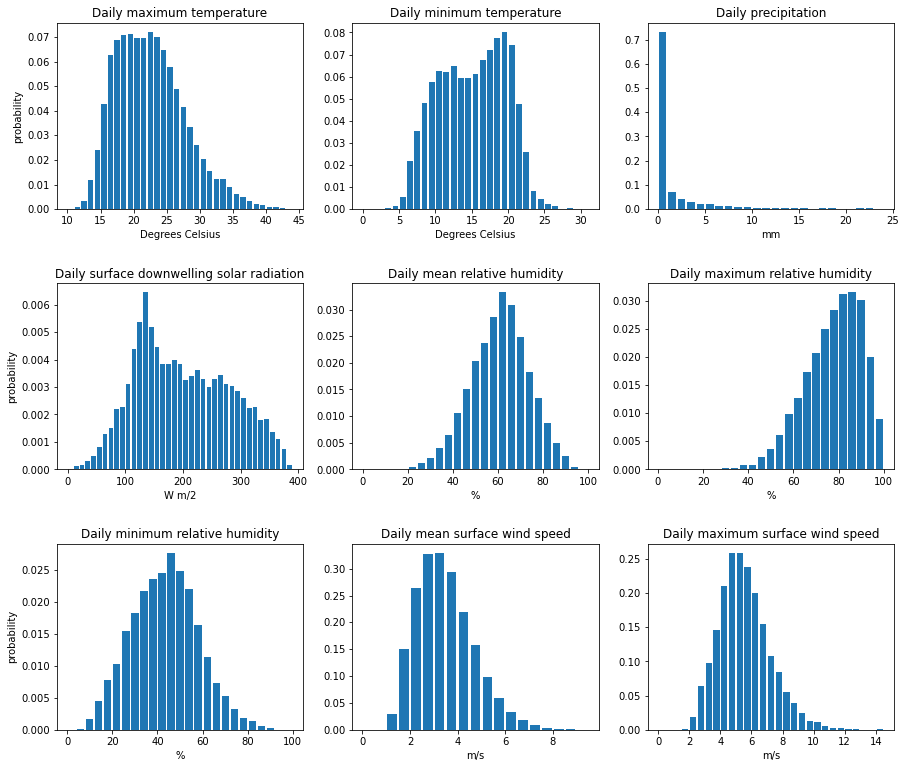

In [64]:
fig = plt.figure(figsize=[15, 13])
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

rwidth = 0.8

da_tasmax_loc.plot.hist(ax=ax1, bins=np.arange(10, 45, 1), density=True, rwidth=rwidth)
ax1.set_ylabel('probability')
ax1.set_xlabel('Degrees Celsius')
ax1.set_title('Daily maximum temperature')

da_tasmin_loc.plot.hist(ax=ax2, bins=np.arange(0, 32, 1), density=True, rwidth=rwidth)
#ax2.set_ylabel('probability')
ax2.set_xlabel('Degrees Celsius')
ax2.set_title('Daily minimum temperature')

da_pr_loc.plot.hist(ax=ax3, bins=np.arange(0, 25, 1), density=True, rwidth=rwidth)
#ax3.set_ylabel('probability')
ax3.set_xlabel('mm')
ax3.set_title('Daily precipitation')

da_rsds_loc.plot.hist(ax=ax4, bins=np.arange(0, 400, 10), density=True, rwidth=rwidth)
ax4.set_ylabel('probability')
ax4.set_xlabel('W m/2')
ax4.set_title('Daily surface downwelling solar radiation')

da_hurs_loc.plot.hist(ax=ax5, bins=np.arange(0, 101, 4), density=True, rwidth=rwidth)
#ax5.set_ylabel('probability')
ax5.set_xlabel('%')
ax5.set_title('Daily mean relative humidity')

da_hursmax_loc.plot.hist(ax=ax6, bins=np.arange(0, 101, 4), density=True, rwidth=rwidth)
#ax6.set_ylabel('probability')
ax6.set_xlabel('%')
ax6.set_title('Daily maximum relative humidity')

da_hursmin_loc.plot.hist(ax=ax7, bins=np.arange(0, 101, 4), density=True, rwidth=rwidth)
ax7.set_ylabel('probability')
ax7.set_xlabel('%')
ax7.set_title('Daily minimum relative humidity')

da_sfcwind_loc.plot.hist(ax=ax8, bins=np.arange(0, 10, 0.5), density=True, rwidth=rwidth)
#ax8.set_ylabel('probability')
ax8.set_xlabel('m/s')
ax8.set_title('Daily mean surface wind speed')

da_sfcwindmax_loc.plot.hist(ax=ax9, bins=np.arange(0, 15, 0.5), density=True, rwidth=rwidth)
#ax9.set_ylabel('probability')
ax9.set_xlabel('m/s')
ax9.set_title('Daily maximum surface wind speed')

plt.subplots_adjust(hspace=0.4)
plt.savefig('distributions.png', bbox_inches='tight', facecolor='white', dpi=300)
plt.show()